In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

In [4]:
livestock = pd.read_csv('data/Production_Livestock_E_All_Data_(Normalized).csv',  encoding='iso-8859-1')
beehives = livestock.loc[livestock['Item'] == 'Beehives', ['Area', 'Year', 'Value']]
beehives.columns = ['Area', 'Year', 'Beehives']
beehives[beehives.Area == 'World'].head()

,Area,Year,Beehives
137235,World,1961,49173473.0
137236,World,1962,49639027.0
137237,World,1963,49970283.0
137238,World,1964,49625534.0
137239,World,1965,50368109.0


In [5]:
crops = pd.read_csv('data/FAOSTAT/Production_Crops_E_All_Data_(Normalized).csv', encoding='iso-8859-1')
crops = crops.loc[(crops['Element'] == 'Yield'), ['Area', 'Item', 'Year', 'Value']]
crops.reset_index(drop=True, inplace=True)
crops.sort_values(inplace=True, by=['Area', 'Item', 'Year'])
crops.columns = ['Area', 'Item', 'Year', 'Yield']
crops[crops.Area == 'World'].head()

,Area,Item,Year,Yield
530798,World,Agave fibres nes,1961,10779.0
530799,World,Agave fibres nes,1962,9988.0
530800,World,Agave fibres nes,1963,10261.0
530801,World,Agave fibres nes,1964,10447.0
530802,World,Agave fibres nes,1965,10408.0


In [6]:
beehives_world = beehives[beehives.Area == 'World']
crops_world = crops[crops.Area == 'World']

In [7]:
joined = beehives_world.merge(crops_world)
joined.drop('Area', inplace=True, axis=1)

In [8]:
joined

,Year,Beehives,Item,Yield
0,1961,49173473.0,Agave fibres nes,10779.0
1,1961,49173473.0,"Almonds, with shell",10298.0
2,1961,49173473.0,"Anise, badian, fennel, coriander",6671.0
3,1961,49173473.0,Apples,99059.0
4,1961,49173473.0,Apricots,61753.0
...,...,...,...,...
9654,2017,90999730.0,"Walnuts, with shell",34888.0
9655,2017,90999730.0,Watermelons,340534.0
9656,2017,90999730.0,Wheat,35312.0
9657,2017,90999730.0,Yams,85297.0


In [9]:
df_dict = {}

for item in crops.Item.unique():
    df_dict[item] = crops[(crops.Item == item) & (crops.Area == 'World')]['Yield'].tolist()

In [10]:
to_remove = []

for k in df_dict.items():
    if len(k[1]) != 57:
        to_remove.append(k[0])
        
for key in to_remove:
    del df_dict[key]
    
crops_features = pd.DataFrame(df_dict)
crops_features.index = pd.to_datetime(list(map(str, sorted(crops.Year.unique()))))
crops_features.head()

,"Almonds, with shell","Anise, badian, fennel, coriander",Apples,Apricots,Barley,Berries nes,Cereals (Rice Milled Eqv),"Cereals,Total","Citrus Fruit,Total","Coarse Grain, Total",...,Persimmons,Quinoa,Ramie,Yautia (cocoyam),Areca nuts,Gooseberries,Kapok fruit,Mushrooms and truffles,Poppy seed,"Sugar crops, nes"
1961-01-01,10298.0,6671.0,99059.0,61753.0,13282.0,80309.0,12424.0,13532.0,109645.0,13363.0,...,80901.0,6172.0,11700.0,50748.0,7127.0,38888.0,12814.0,1678397.0,5239.0,51610.0
1962-01-01,5797.0,6749.0,118880.0,48723.0,15254.0,77842.0,13122.0,14275.0,105533.0,13970.0,...,68340.0,6707.0,11985.0,51879.0,6885.0,39911.0,12970.0,1621372.0,5354.0,51455.0
1963-01-01,7819.0,6559.0,112283.0,60021.0,14286.0,77719.0,13152.0,14401.0,101153.0,14083.0,...,75555.0,7444.0,11965.0,51051.0,6983.0,40970.0,14785.0,1546328.0,5098.0,51356.0
1964-01-01,8079.0,6779.0,116368.0,57709.0,15512.0,79118.0,13632.0,14938.0,103188.0,14286.0,...,75154.0,7074.0,12004.0,51386.0,6915.0,38869.0,15086.0,1628106.0,3741.0,51016.0
1965-01-01,7661.0,7035.0,107601.0,59209.0,15479.0,80354.0,13699.0,14967.0,108560.0,14779.0,...,65924.0,6959.0,11865.0,51953.0,6760.0,40388.0,15320.0,1608508.0,4608.0,51532.0


In [11]:
beehives_world = beehives[beehives.Area == 'World']['Beehives']

X_train = crops_features.iloc[:-10]
X_test = crops_features.iloc[-10:]
y_train = beehives_world.iloc[:-10]
y_test = beehives_world.iloc[-10:]

In [12]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg.score(X_test, y_test)

-0.9261537109067812

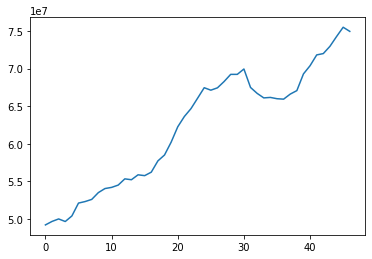

In [13]:
plt.plot(list(y_train))

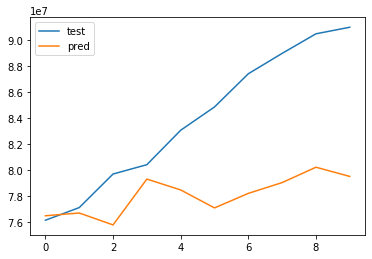

In [14]:
plt.plot(list(y_test), label='test')
plt.plot(y_pred, label='pred')
plt.legend();

In [15]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

estimator = SVR(kernel="linear")
selector = RFE(estimator, 5, step=1)
selector = selector.fit(crops_features, beehives_world)
selector.support_

selector.ranking_

array([109,  75,  35, 124,  79,  74,  97, 100, 140,  22,   3, 134,  98,
        71,  38,  73, 122,  16,  64,  82, 116,  44,  27, 102,  66,  15,
        87,  63, 133,  56, 123, 157,  43,  61, 141,  24, 149,  39, 135,
       158, 136,  90,  72,  48, 119,  13,  62,  12, 110, 152,  76, 113,
        23, 101, 155,  84,  33,  14,  53,   5,  41,  40,  34,   4,  20,
         1, 150, 142,  86,  68,  32,  85,  80, 104, 139, 148, 132, 143,
        57,  49, 144,  21, 107,  36,  26,  45, 120,  50,  54, 117, 154,
       115,   1,  78, 129,  31, 138, 145,  93, 126,  17,  30, 114,  89,
         6, 147,  51,  81,  37,  11,  25,  88,  96,  67,  99,  42,  19,
        58,   2,   8,   1, 118,  65,  46, 103, 105,  94, 121,  60,  28,
        10, 156, 108,   9,  91, 159,  83,  70,  69,  52,  95, 131, 137,
        77,  92,  18, 111, 153,  59,   1,  47, 125, 106,  29,   1, 128,
        55, 112, 127,   7, 146, 151, 130])

In [125]:
list(crops_features.columns[selector.ranking_])[:10]

['Okra',
 'Coconuts',
 'Spices, nes',
 'Roots and tubers, nes',
 'Cucumbers and gherkins',
 'Cocoa, beans',
 'Lentils',
 'Maize, green',
 'Tung nuts',
 'Onions, dry']

In [17]:
crops_features_small = crops_features.loc[:, crops_features.columns[selector.ranking_[:22]]]

X_train = crops_features_small.iloc[:-15]
X_test = crops_features_small.iloc[-15:]
y_train = beehives_world.iloc[:-15]
y_test = beehives_world.iloc[-15:]

reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg.score(X_test, y_test)

0.9068423421897824

In [18]:
reg.coef_

array([-1.97750171e+02, -1.54712593e+01,  2.54384638e+00,  3.02898991e+02,
        6.36294538e+01,  2.56499253e+03,  7.66392938e+02,  3.03608541e+01,
       -5.83869732e+00, -6.05725769e+01,  4.90809919e+01,  3.47978346e+01,
       -1.25124333e+01, -7.00198512e+00,  1.93923630e+02, -8.12582491e+01,
        9.75521894e+02, -9.80662027e+02, -3.18320399e+01, -1.36827098e+02,
        3.80129271e+02,  4.17830472e+00])

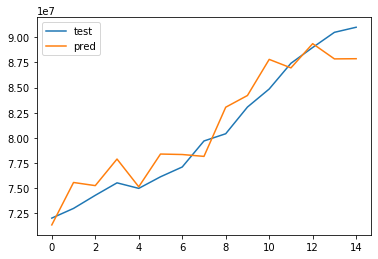

In [19]:
plt.plot(list(y_test), label='test')
plt.plot(y_pred, label='pred')
plt.legend();

# Predict beehives density from crop yields
Either put size of the country as a feature or predict the beehives density (beehives number divided by country area)

In [20]:
crops_1994 = crops[crops.Year >= 1994].copy()
crops_1994

,Area,Item,Year,Yield
18,Afghanistan,"Almonds, with shell",1994,16364.0
19,Afghanistan,"Almonds, with shell",1995,16364.0
20,Afghanistan,"Almonds, with shell",1996,16364.0
21,Afghanistan,"Almonds, with shell",1997,16364.0
22,Afghanistan,"Almonds, with shell",1998,16364.0
...,...,...,...,...
530136,Zimbabwe,Wheat,2013,23430.0
530137,Zimbabwe,Wheat,2014,21958.0
530138,Zimbabwe,Wheat,2015,20486.0
530139,Zimbabwe,Wheat,2016,19014.0


In [21]:
rm_countries = []
rm_countries += list(set(crops[crops.Year == 2017].Area.unique()) - set(crops[crops.Year == 1994].Area.unique()))
rm_countries += list(set(crops[crops.Year == 1994].Area.unique()) - set(crops[crops.Year == 2017].Area.unique()))
crops_1994 = crops_1994[~crops_1994.Area.isin(rm_countries)]

In [22]:
rm_crops = []

len(crops_1994) == len(crops_1994.Area.unique()) * len(crops_1994.Item.unique()) * len(crops_1994.Year.unique())

False

In [23]:
crops_1994

,Area,Item,Year,Yield
18,Afghanistan,"Almonds, with shell",1994,16364.0
19,Afghanistan,"Almonds, with shell",1995,16364.0
20,Afghanistan,"Almonds, with shell",1996,16364.0
21,Afghanistan,"Almonds, with shell",1997,16364.0
22,Afghanistan,"Almonds, with shell",1998,16364.0
...,...,...,...,...
530136,Zimbabwe,Wheat,2013,23430.0
530137,Zimbabwe,Wheat,2014,21958.0
530138,Zimbabwe,Wheat,2015,20486.0
530139,Zimbabwe,Wheat,2016,19014.0


In [24]:
index = pd.MultiIndex.from_product([crops_1994.Area.unique(), crops_1994.Year.unique()], names = ["Area", "Year"])
df = pd.DataFrame(index = index).reset_index()

In [25]:
for item in crops_1994.Item.unique():
    right = crops_1994.loc[crops_1994.Item == item, ['Area', 'Year', 'Yield']]
    
    
    
    if len(right) >= len(df)/20:
        df = df.merge(right, how='left', on=['Area', 'Year'])
        df = df.rename(columns={'Yield': item})

In [26]:
df = df[df.columns[df.isna().sum() < 1500]].dropna()
df

,Area,Year,Cereals (Rice Milled Eqv),"Cereals,Total","Coarse Grain, Total",Fruit Primary,"Fruit, fresh nes",Maize,"Oilcrops, Cake Equivalent","Oilcrops, Oil Equivalent",Potatoes,"Pulses,Total","Roots and Tubers,Total",Vegetables Primary,"Vegetables, fresh nes",Tomatoes
24,Africa,1994,11433.0,11948.0,10432.0,67069.0,62566.0,16024.0,2632.0,2532.0,111361.0,5034.0,82478.0,83280.0,62917.0,195138.0
25,Africa,1995,10586.0,11151.0,9616.0,68048.0,62714.0,13934.0,2685.0,2519.0,121083.0,4909.0,83366.0,84646.0,63262.0,201192.0
26,Africa,1996,12672.0,13237.0,11362.0,70305.0,62675.0,17152.0,2884.0,2707.0,120567.0,5066.0,83006.0,85729.0,64100.0,208953.0
27,Africa,1997,11406.0,12008.0,10360.0,70098.0,62715.0,16209.0,2808.0,2534.0,116021.0,4917.0,86133.0,85818.0,64076.0,198329.0
28,Africa,1998,11718.0,12278.0,10580.0,69495.0,62402.0,15910.0,2859.0,2609.0,123650.0,5087.0,83053.0,86173.0,64046.0,192475.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5776,Zimbabwe,2010,7336.0,7337.0,7265.0,64742.0,63669.0,8751.0,3296.0,1448.0,166967.0,4202.0,53051.0,70523.0,66303.0,78125.0
5777,Zimbabwe,2011,5876.0,5877.0,5785.0,66174.0,64389.0,6568.0,3031.0,1214.0,167407.0,3483.0,53110.0,66161.0,61538.0,71524.0
5778,Zimbabwe,2012,6963.0,6964.0,6751.0,68152.0,65455.0,7912.0,2835.0,1058.0,171875.0,4517.0,54287.0,75405.0,72000.0,71212.0
5779,Zimbabwe,2013,6691.0,6693.0,6475.0,68233.0,65455.0,7449.0,3616.0,1378.0,165714.0,4768.0,53412.0,75405.0,72000.0,71212.0


In [27]:
df = df.merge(beehives)

In [28]:
df.dropna(inplace=True)

In [29]:
df

,Area,Year,Cereals (Rice Milled Eqv),"Cereals,Total","Coarse Grain, Total",Fruit Primary,"Fruit, fresh nes",Maize,"Oilcrops, Cake Equivalent","Oilcrops, Oil Equivalent",Potatoes,"Pulses,Total","Roots and Tubers,Total",Vegetables Primary,"Vegetables, fresh nes",Tomatoes,Beehives
0,Africa,1994,11433.0,11948.0,10432.0,67069.0,62566.0,16024.0,2632.0,2532.0,111361.0,5034.0,82478.0,83280.0,62917.0,195138.0,14069000.0
1,Africa,1995,10586.0,11151.0,9616.0,68048.0,62714.0,13934.0,2685.0,2519.0,121083.0,4909.0,83366.0,84646.0,63262.0,201192.0,14062337.0
2,Africa,1996,12672.0,13237.0,11362.0,70305.0,62675.0,17152.0,2884.0,2707.0,120567.0,5066.0,83006.0,85729.0,64100.0,208953.0,14395882.0
3,Africa,1997,11406.0,12008.0,10360.0,70098.0,62715.0,16209.0,2808.0,2534.0,116021.0,4917.0,86133.0,85818.0,64076.0,198329.0,14158420.0
4,Africa,1998,11718.0,12278.0,10580.0,69495.0,62402.0,15910.0,2859.0,2609.0,123650.0,5087.0,83053.0,86173.0,64046.0,192475.0,14057474.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,Zambia,2010,25194.0,25335.0,24676.0,45954.0,47170.0,25871.0,4403.0,2022.0,162228.0,4655.0,53048.0,76796.0,72865.0,96296.0,54000.0
2178,Zambia,2011,27181.0,27314.0,26384.0,45003.0,46674.0,27414.0,6141.0,3189.0,162847.0,4822.0,54167.0,77615.0,72893.0,97732.0,55000.0
2179,Zambia,2012,26766.0,26893.0,25757.0,43657.0,45310.0,26545.0,4948.0,1748.0,161166.0,5161.0,55614.0,78351.0,72917.0,100000.0,56000.0
2180,Zambia,2013,25194.0,25324.0,24245.0,43728.0,45614.0,25382.0,5424.0,1885.0,163930.0,5161.0,55149.0,78331.0,72917.0,98628.0,57000.0


> The problem I have here is that a lot of data is missing and I have to make a tradeof between how many features (crops) vs how many data points I will get without null values

In [30]:
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True)

In [31]:
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg.score(X_test, y_test)

0.04671657020780673

Now I don't have any motivation left to try and figure out if this is really useless or it is just some problem with predicting this with ridge regression or something similar that could be easily fixed. It's a shame because this could be an interesting thins, but it's hard to use this data.

First thing I should do is convert area to real area (square meters) instead of country names which cannot be used in the model

In [32]:
land = pd.read_csv('data/Inputs_LandUse_E_All_Data_(Normalized).csv',  encoding='iso-8859-1')
land = land.loc[land.Item == 'Country area', ['Area', 'Year', 'Value']]
land.columns = ['Area', 'Year', 'Country Size']
land.head()

,Area,Year,Country Size
0,Afghanistan,1961,65286.0
1,Afghanistan,1962,65286.0
2,Afghanistan,1963,65286.0
3,Afghanistan,1964,65286.0
4,Afghanistan,1965,65286.0


In [33]:
final_df = df.merge(land, on=['Area', 'Year'])
final_df['Area'] = final_df['Country Size']
final_df.drop('Country Size', axis=1, inplace=True)
final_df.head()

,Area,Year,Cereals (Rice Milled Eqv),"Cereals,Total","Coarse Grain, Total",Fruit Primary,"Fruit, fresh nes",Maize,"Oilcrops, Cake Equivalent","Oilcrops, Oil Equivalent",Potatoes,"Pulses,Total","Roots and Tubers,Total",Vegetables Primary,"Vegetables, fresh nes",Tomatoes,Beehives
0,3031837.5,1994,11433.0,11948.0,10432.0,67069.0,62566.0,16024.0,2632.0,2532.0,111361.0,5034.0,82478.0,83280.0,62917.0,195138.0,14069000.0
1,3031837.5,1995,10586.0,11151.0,9616.0,68048.0,62714.0,13934.0,2685.0,2519.0,121083.0,4909.0,83366.0,84646.0,63262.0,201192.0,14062337.0
2,3031837.5,1996,12672.0,13237.0,11362.0,70305.0,62675.0,17152.0,2884.0,2707.0,120567.0,5066.0,83006.0,85729.0,64100.0,208953.0,14395882.0
3,3031837.5,1997,11406.0,12008.0,10360.0,70098.0,62715.0,16209.0,2808.0,2534.0,116021.0,4917.0,86133.0,85818.0,64076.0,198329.0,14158420.0
4,3031837.5,1998,11718.0,12278.0,10580.0,69495.0,62402.0,15910.0,2859.0,2609.0,123650.0,5087.0,83053.0,86173.0,64046.0,192475.0,14057474.0


In [34]:
X = final_df.iloc[:, 1:-1]
y = final_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True)

In [35]:
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg.score(X_test, y_test)

0.044272604782722214

In [36]:
regr = RandomForestRegressor(n_estimators=200, max_depth=100, random_state=0)
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.8400606997698797


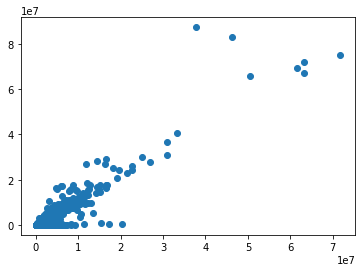

In [37]:
plt.scatter(regr.predict(X_test), y_test);

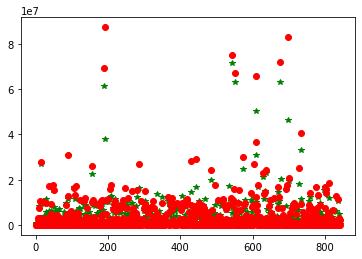

In [38]:
plt.plot(regr.predict(X_test), 'g*', np.array(list(y_test)), 'ro')
plt.show()

In [39]:
regr.feature_importances_

array([0.01139329, 0.01425879, 0.02181957, 0.02878829, 0.0289154 ,
       0.09639579, 0.14899896, 0.03400121, 0.11886852, 0.02030967,
       0.10845759, 0.20477245, 0.03316353, 0.07652086, 0.05333607])

In [40]:
X_test.columns[np.argmax(regr.feature_importances_)]

'Roots and Tubers,Total'

This is the most important feature for the model!

In [47]:
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [None],
    'max_features': ['sqrt', 'auto'],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 2],
    'n_estimators': [350, 400, 450]
}
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [48]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   59.8s finished
/Users/alencarin/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [49]:
best_grid = grid_search.best_estimator_
best_grid.score(X_test, y_test)

0.8901733805826992

In [50]:
final_df = df.merge(land, on=['Area', 'Year'])
final_df['Area'] = final_df['Country Size']
final_df.drop('Country Size', axis=1, inplace=True)
final_df = final_df[final_df.Area < final_df.Area.quantile(.95)]
final_df.head()

,Area,Year,Cereals (Rice Milled Eqv),"Cereals,Total","Coarse Grain, Total",Fruit Primary,"Fruit, fresh nes",Maize,"Oilcrops, Cake Equivalent","Oilcrops, Oil Equivalent",Potatoes,"Pulses,Total","Roots and Tubers,Total",Vegetables Primary,"Vegetables, fresh nes",Tomatoes,Beehives
21,2875.0,1994,24609.0,24609.0,24360.0,139892.0,20911.0,25848.0,3985.0,1514.0,81404.0,7495.0,81404.0,166994.0,107442.0,229449.0,26900.0
22,2875.0,1995,28415.0,28415.0,27940.0,147970.0,30000.0,31300.0,6001.0,1985.0,111323.0,7861.0,111323.0,175875.0,103500.0,241935.0,40000.0
23,2875.0,1996,24509.0,24509.0,28781.0,165156.0,30000.0,32604.0,5974.0,1483.0,106138.0,9101.0,106138.0,193538.0,100000.0,321429.0,53900.0
24,2875.0,1997,28333.0,28333.0,28006.0,146733.0,27913.0,31862.0,5986.0,1798.0,109874.0,8050.0,109874.0,186410.0,105185.0,294118.0,57300.0
25,2875.0,1998,28721.0,28721.0,30099.0,148789.0,31065.0,33416.0,6230.0,2468.0,127212.0,8834.0,127212.0,189206.0,107187.0,300000.0,56500.0


In [51]:
X = final_df.iloc[:, :-1]
y = final_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

rf = RandomForestRegressor(**grid_search.best_params_).fit(X_train, y_train)
rf.score(X_test, y_test)

0.9861200222944497

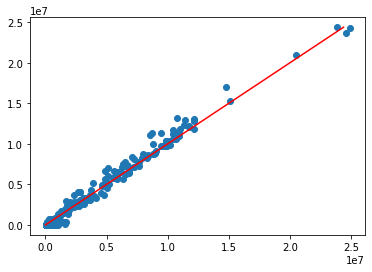

In [52]:
plt.scatter(rf.predict(X_test), y_test)
plt.plot((0, y_test.max()),(0, y_test.max()), c='r');

In [58]:
errors = abs(rf.predict(X_test) - y_test)
print("Deviating from real value by %.2f percent" % (100 * np.median(errors / y_test)))

Deviating from real value by 24.23 percent


These results seem to be meaningful, half of the real values deviate from the predicted one for less than 25%

### We agreed I should divide into train and test set by countries

In [128]:
def split_train_test(df, merged=None):
    np.random.seed(0)
    areas = df.Area.unique()

    train = np.random.choice(areas, size=int(areas.size*0.7), replace=False)
    test = areas[~np.isin(areas, train)]

    X_train = df.loc[df.Area.isin(train), df.columns[df.columns != 'Beehives']]
    y_train = df[df.Area.isin(train)]['Beehives']
    X_test = df.loc[(df.Area.isin(test)) & (df.Year == 2005) & (df.Area > df.Area.quantile(.5)), df.columns[df.columns != 'Beehives']]
    y_test = df[(df.Area.isin(test)) & (df.Year == 2005) & (df.Area > df.Area.quantile(.5))]['Beehives']
    
    merged[merged['Country Size'].isin(X_train.Area)].Area
    
    param_grid = {
        'max_depth': [None],
        'max_features': ['sqrt', 'auto'],
        'min_samples_leaf': [1, 2],
        'min_samples_split': [2, 2],
        'n_estimators': [350, 400, 450]
    }
    rf = RandomForestRegressor()
    grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                              cv = 3, n_jobs = -1, verbose = 2)
    grid_search.fit(X_train, y_train)

    rf = RandomForestRegressor(**grid_search.best_params_).fit(X_train, y_train)
    print(rf.score(X_test, y_test))
    
    plt.figure(figsize=(15, 8))
    plt.scatter(rf.predict(X_test), y_test)
    plt.xlabel('Beehives prediction')
    plt.ylabel('Beehives real')
    plt.plot((0, y_test.max()),(0, y_test.max()), c='r')
    plt.show()
    
    errors = abs(rf.predict(X_test) - y_test)
    print("Deviating from real value by %.2f percent" % (100 * np.median(errors / y_test)))
    
    x = X_test.Area.tolist()
    y = y_test.tolist()
    
    fig, ax = plt.subplots(figsize=(15, 8))
    ax.scatter(x, y)
    ax.scatter(x, rf.predict(X_test), c='r', marker='x')
    plt.xlabel('Area')
    plt.ylabel('Beehives')
    
    for i, size in enumerate(x):
        ax.annotate(merged[merged['Country Size'] == size]['Area'].tolist()[0], (x[i], y[i]))

In [59]:
df.Year.unique()

array([1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014])

In [60]:
final_df = df.merge(land, on=['Area', 'Year'])
final_df['Area'] = final_df['Country Size']
final_df.drop('Country Size', axis=1, inplace=True)
final_df = final_df[final_df.Area < final_df.Area.quantile(.95)]
final_df

,Area,Year,Cereals (Rice Milled Eqv),"Cereals,Total","Coarse Grain, Total",Fruit Primary,"Fruit, fresh nes",Maize,"Oilcrops, Cake Equivalent","Oilcrops, Oil Equivalent",Potatoes,"Pulses,Total","Roots and Tubers,Total",Vegetables Primary,"Vegetables, fresh nes",Tomatoes,Beehives
21,2875.0,1994,24609.0,24609.0,24360.0,139892.0,20911.0,25848.0,3985.0,1514.0,81404.0,7495.0,81404.0,166994.0,107442.0,229449.0,26900.0
22,2875.0,1995,28415.0,28415.0,27940.0,147970.0,30000.0,31300.0,6001.0,1985.0,111323.0,7861.0,111323.0,175875.0,103500.0,241935.0,40000.0
23,2875.0,1996,24509.0,24509.0,28781.0,165156.0,30000.0,32604.0,5974.0,1483.0,106138.0,9101.0,106138.0,193538.0,100000.0,321429.0,53900.0
24,2875.0,1997,28333.0,28333.0,28006.0,146733.0,27913.0,31862.0,5986.0,1798.0,109874.0,8050.0,109874.0,186410.0,105185.0,294118.0,57300.0
25,2875.0,1998,28721.0,28721.0,30099.0,148789.0,31065.0,33416.0,6230.0,2468.0,127212.0,8834.0,127212.0,189206.0,107187.0,300000.0,56500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2102,75261.0,2010,25194.0,25335.0,24676.0,45954.0,47170.0,25871.0,4403.0,2022.0,162228.0,4655.0,53048.0,76796.0,72865.0,96296.0,54000.0
2103,75261.0,2011,27181.0,27314.0,26384.0,45003.0,46674.0,27414.0,6141.0,3189.0,162847.0,4822.0,54167.0,77615.0,72893.0,97732.0,55000.0
2104,75261.0,2012,26766.0,26893.0,25757.0,43657.0,45310.0,26545.0,4948.0,1748.0,161166.0,5161.0,55614.0,78351.0,72917.0,100000.0,56000.0
2105,75261.0,2013,25194.0,25324.0,24245.0,43728.0,45614.0,25382.0,5424.0,1885.0,163930.0,5161.0,55149.0,78331.0,72917.0,98628.0,57000.0


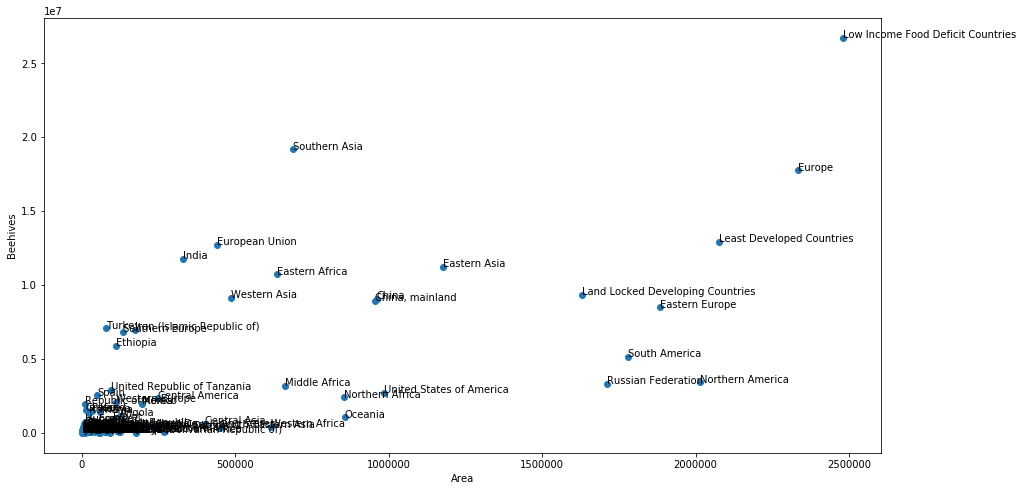

In [61]:
merged = df.merge(land, on=['Area', 'Year'])
final_df2014 = final_df.loc[final_df.Year == 2014]

z = final_df2014.Area.tolist()
y = final_df2014.Beehives.tolist()

fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(z, y)
plt.xlabel('Area')
plt.ylabel('Beehives')

for i, size in enumerate(z):
    ax.annotate(merged[merged['Country Size'] == size]['Area'].tolist()[0], (z[i], y[i]))

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   29.0s finished


0.9174285979000434


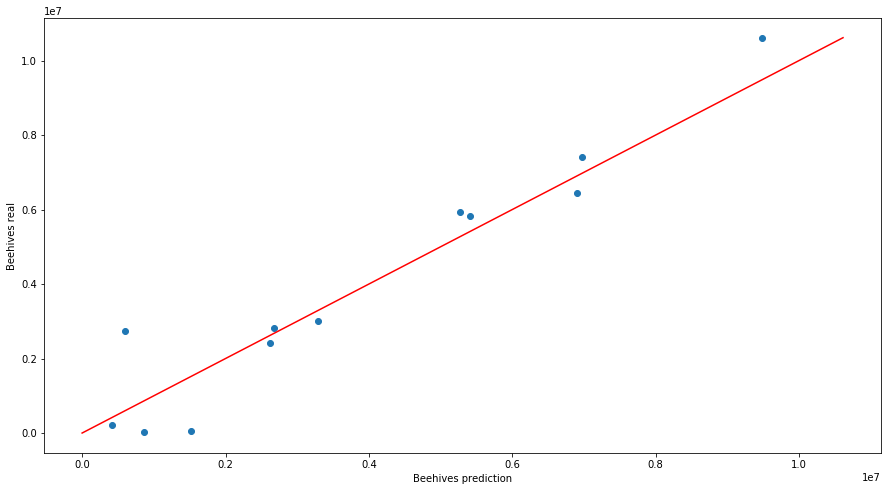

Deviating from real value by 9.79 percent


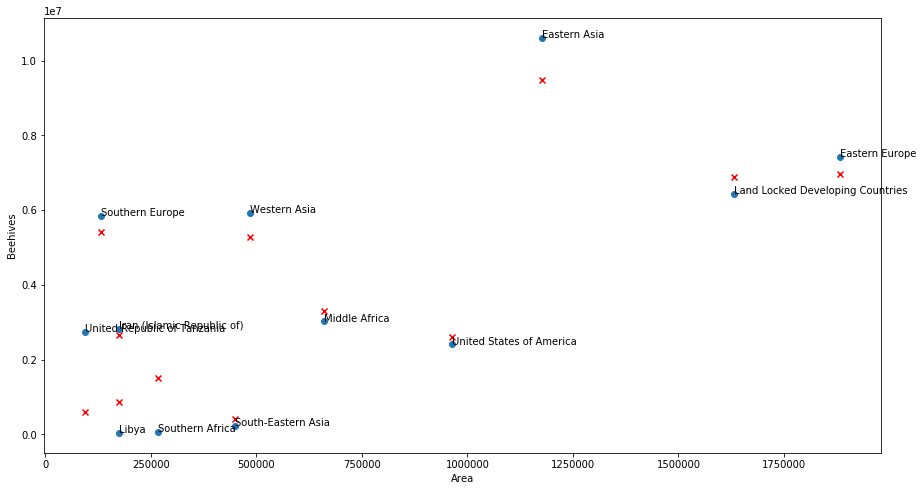

In [129]:
split_train_test(final_df, df.merge(land, on=['Area', 'Year']))

In [74]:
merged = df.merge(land, on=['Area', 'Year'])
merged

,Area,Year,Cereals (Rice Milled Eqv),"Cereals,Total","Coarse Grain, Total",Fruit Primary,"Fruit, fresh nes",Maize,"Oilcrops, Cake Equivalent","Oilcrops, Oil Equivalent",Potatoes,"Pulses,Total","Roots and Tubers,Total",Vegetables Primary,"Vegetables, fresh nes",Tomatoes,Beehives,Country Size
0,Africa,1994,11433.0,11948.0,10432.0,67069.0,62566.0,16024.0,2632.0,2532.0,111361.0,5034.0,82478.0,83280.0,62917.0,195138.0,14069000.0,3031837.5
1,Africa,1995,10586.0,11151.0,9616.0,68048.0,62714.0,13934.0,2685.0,2519.0,121083.0,4909.0,83366.0,84646.0,63262.0,201192.0,14062337.0,3031837.5
2,Africa,1996,12672.0,13237.0,11362.0,70305.0,62675.0,17152.0,2884.0,2707.0,120567.0,5066.0,83006.0,85729.0,64100.0,208953.0,14395882.0,3031837.5
3,Africa,1997,11406.0,12008.0,10360.0,70098.0,62715.0,16209.0,2808.0,2534.0,116021.0,4917.0,86133.0,85818.0,64076.0,198329.0,14158420.0,3031837.5
4,Africa,1998,11718.0,12278.0,10580.0,69495.0,62402.0,15910.0,2859.0,2609.0,123650.0,5087.0,83053.0,86173.0,64046.0,192475.0,14057474.0,3031837.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2102,Zambia,2010,25194.0,25335.0,24676.0,45954.0,47170.0,25871.0,4403.0,2022.0,162228.0,4655.0,53048.0,76796.0,72865.0,96296.0,54000.0,75261.0
2103,Zambia,2011,27181.0,27314.0,26384.0,45003.0,46674.0,27414.0,6141.0,3189.0,162847.0,4822.0,54167.0,77615.0,72893.0,97732.0,55000.0,75261.0
2104,Zambia,2012,26766.0,26893.0,25757.0,43657.0,45310.0,26545.0,4948.0,1748.0,161166.0,5161.0,55614.0,78351.0,72917.0,100000.0,56000.0,75261.0
2105,Zambia,2013,25194.0,25324.0,24245.0,43728.0,45614.0,25382.0,5424.0,1885.0,163930.0,5161.0,55149.0,78331.0,72917.0,98628.0,57000.0,75261.0


The model was probably trained on countries that include the region which we're predicting and that could be a reason why it's working well on bigger regions and not so good when tested on countries. Let's try to solve this by removing the regions

In [107]:
final_df = df.merge(land, on=['Area', 'Year'])
final_df['Area'] = final_df['Country Size']
final_df.drop('Country Size', axis=1, inplace=True)
final_df = final_df[final_df.Area < final_df.Area.quantile(.95)]
final_df

,Area,Year,Cereals (Rice Milled Eqv),"Cereals,Total","Coarse Grain, Total",Fruit Primary,"Fruit, fresh nes",Maize,"Oilcrops, Cake Equivalent","Oilcrops, Oil Equivalent",Potatoes,"Pulses,Total","Roots and Tubers,Total",Vegetables Primary,"Vegetables, fresh nes",Tomatoes,Beehives
21,2875.0,1994,24609.0,24609.0,24360.0,139892.0,20911.0,25848.0,3985.0,1514.0,81404.0,7495.0,81404.0,166994.0,107442.0,229449.0,26900.0
22,2875.0,1995,28415.0,28415.0,27940.0,147970.0,30000.0,31300.0,6001.0,1985.0,111323.0,7861.0,111323.0,175875.0,103500.0,241935.0,40000.0
23,2875.0,1996,24509.0,24509.0,28781.0,165156.0,30000.0,32604.0,5974.0,1483.0,106138.0,9101.0,106138.0,193538.0,100000.0,321429.0,53900.0
24,2875.0,1997,28333.0,28333.0,28006.0,146733.0,27913.0,31862.0,5986.0,1798.0,109874.0,8050.0,109874.0,186410.0,105185.0,294118.0,57300.0
25,2875.0,1998,28721.0,28721.0,30099.0,148789.0,31065.0,33416.0,6230.0,2468.0,127212.0,8834.0,127212.0,189206.0,107187.0,300000.0,56500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2102,75261.0,2010,25194.0,25335.0,24676.0,45954.0,47170.0,25871.0,4403.0,2022.0,162228.0,4655.0,53048.0,76796.0,72865.0,96296.0,54000.0
2103,75261.0,2011,27181.0,27314.0,26384.0,45003.0,46674.0,27414.0,6141.0,3189.0,162847.0,4822.0,54167.0,77615.0,72893.0,97732.0,55000.0
2104,75261.0,2012,26766.0,26893.0,25757.0,43657.0,45310.0,26545.0,4948.0,1748.0,161166.0,5161.0,55614.0,78351.0,72917.0,100000.0,56000.0
2105,75261.0,2013,25194.0,25324.0,24245.0,43728.0,45614.0,25382.0,5424.0,1885.0,163930.0,5161.0,55149.0,78331.0,72917.0,98628.0,57000.0


In [130]:
regions = ['European Union', 'Europe', 'Eastern Europe', 'Northern Europe', 'Northern America', 'Central America', 
           'Central Asia', 'Eastern Asia', 'Northern Africa', 'Eastern Africa', 'Western Africa', 'Western Asia', 
           'Western Europe', 'Low Income Food Deficit Countries', 'Small Island Developing States', 'South Africa', 
           'South America', 'South-Eastern Asia', 'Southern Asia', 'Southern Europe', 'Least Developed Countries', 
           'Middle Africa', 'China, mainland', 'Russian Federation']

np.random.seed(0)

areas = final_df.Area.unique()
areas = areas[np.isin(areas, merged[~merged.Area.isin(regions)]['Country Size'].unique())]

train = np.random.choice(areas, size=int(areas.size*0.7), replace=False)
test = areas[~np.isin(areas, train)]

X_train = final_df.loc[final_df.Area.isin(train), final_df.columns[final_df.columns != 'Beehives']]
y_train = final_df[final_df.Area.isin(train)]['Beehives']
X_test = final_df.loc[(final_df.Area.isin(test)) & (final_df.Year == 2005), final_df.columns[final_df.columns != 'Beehives']]
y_test = final_df[(final_df.Area.isin(test)) & (final_df.Year == 2005)]['Beehives']

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   28.9s finished
/Users/alencarin/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


-1.048883146447595


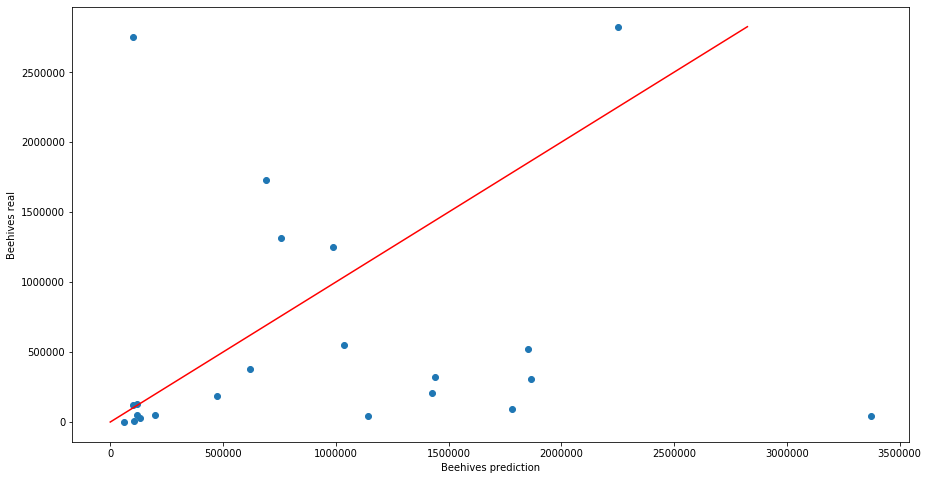

Deviating from real value by 203.57 percent


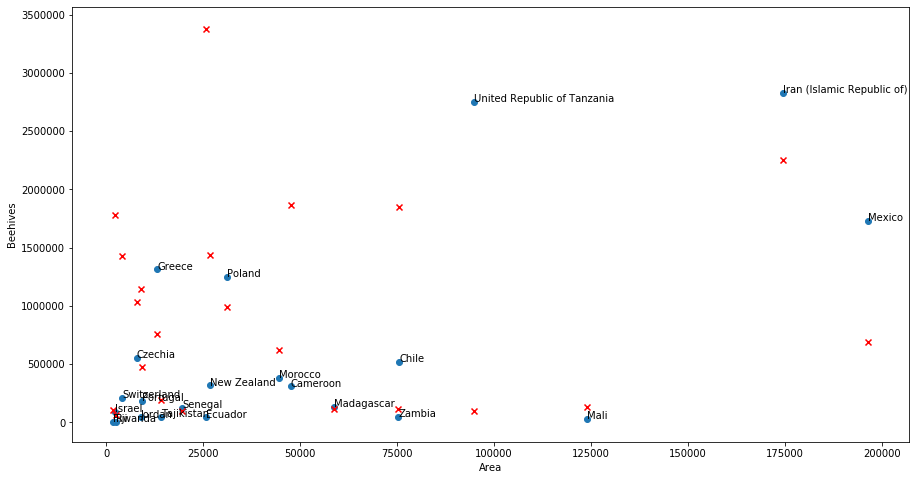

In [131]:
param_grid = {
        'max_depth': [None],
        'max_features': ['sqrt', 'auto'],
        'min_samples_leaf': [1, 2],
        'min_samples_split': [2, 2],
        'n_estimators': [350, 400, 450]
    }
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
    
rf = RandomForestRegressor(**grid_search.best_params_).fit(X_train, y_train)
print(rf.score(X_test, y_test))

plt.figure(figsize=(15, 8))
plt.scatter(rf.predict(X_test), y_test)
plt.xlabel('Beehives prediction')
plt.ylabel('Beehives real')
plt.plot((0, y_test.max()),(0, y_test.max()), c='r')
plt.show()

errors = abs(rf.predict(X_test) - y_test)
print("Deviating from real value by %.2f percent" % (100 * np.median(errors / y_test)))

x = X_test.Area.tolist()
y = y_test.tolist()

fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(x, y)
ax.scatter(x, rf.predict(X_test), c='r', marker='x')
plt.xlabel('Area')
plt.ylabel('Beehives')

for i, size in enumerate(x):
    ax.annotate(merged[merged['Country Size'] == size]['Area'].tolist()[0], (x[i], y[i]))

The prediction is not very good anymore and we can see that it is very hard to predict the number of beehives for a country with just few crops as features. The biggest problem is definitely not having enough data.

I think the problem is that different kind of crops are grown in different parts of the World. Model can infer that some crop is very important as a feature because some countries that have it have a lot of beehives, but then when some country doesn't have that one at all, it will think that it has less beehives while they actually pollinate some other crop. I should introduce another feature which would help distinguish what part of the world is this so that the model knows which crops are important. Maybe temperature could fix this issue.

### Let's add geographic location as features

In [824]:
import requests
from bs4 import BeautifulSoup

In [825]:
URL = 'https://developers.google.com/public-data/docs/canonical/countries_csv'
r = requests.get(URL)
page_body = r.text

soup = BeautifulSoup(page_body, 'html.parser')
soup.title.string

'countries.csv \xa0|\xa0 Dataset Publishing Language \xa0|\xa0 Google Developers'

In [826]:
locations = []
first = True

for line in soup.find_all('tr'):

    if first:
        first = False
        continue
    
    locations.append({'Latitude': line.find_all('td')[1].text,
                  'Longitude': line.find_all('td')[2].text, 
                  'Area': line.find_all('td')[3].text})
    
loc = pd.DataFrame(locations)

In [827]:
loc.replace(np.nan, 0, regex=True)
loc['Latitude'] = pd.to_numeric(loc['Latitude'],errors='coerce')
loc['Longitude'] = pd.to_numeric(loc['Longitude'],errors='coerce')
loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 3 columns):
Latitude     244 non-null float64
Longitude    244 non-null float64
Area         245 non-null object
dtypes: float64(2), object(1)
memory usage: 5.9+ KB


In [828]:
np.intersect1d(df.Area.unique(), loc.Area.unique()).size

61

The intersection is way too small, but we will try it anyway. We probably won't have enough data to train a model.

In [836]:
df_loc = df.merge(loc, on='Area')
df_loc

,Area,Year,Cereals (Rice Milled Eqv),"Cereals,Total","Coarse Grain, Total",Fruit Primary,"Fruit, fresh nes",Maize,"Oilcrops, Cake Equivalent","Oilcrops, Oil Equivalent",Potatoes,"Pulses,Total","Roots and Tubers,Total",Vegetables Primary,"Vegetables, fresh nes",Tomatoes,Beehives,Latitude,Longitude
0,Albania,1994,24609.0,24609.0,24360.0,139892.0,20911.0,25848.0,3985.0,1514.0,81404.0,7495.0,81404.0,166994.0,107442.0,229449.0,26900.0,41.153332,20.168331
1,Albania,1995,28415.0,28415.0,27940.0,147970.0,30000.0,31300.0,6001.0,1985.0,111323.0,7861.0,111323.0,175875.0,103500.0,241935.0,40000.0,41.153332,20.168331
2,Albania,1996,24509.0,24509.0,28781.0,165156.0,30000.0,32604.0,5974.0,1483.0,106138.0,9101.0,106138.0,193538.0,100000.0,321429.0,53900.0,41.153332,20.168331
3,Albania,1997,28333.0,28333.0,28006.0,146733.0,27913.0,31862.0,5986.0,1798.0,109874.0,8050.0,109874.0,186410.0,105185.0,294118.0,57300.0,41.153332,20.168331
4,Albania,1998,28721.0,28721.0,30099.0,148789.0,31065.0,33416.0,6230.0,2468.0,127212.0,8834.0,127212.0,189206.0,107187.0,300000.0,56500.0,41.153332,20.168331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237,Zambia,2010,25194.0,25335.0,24676.0,45954.0,47170.0,25871.0,4403.0,2022.0,162228.0,4655.0,53048.0,76796.0,72865.0,96296.0,54000.0,-13.133897,27.849332
1238,Zambia,2011,27181.0,27314.0,26384.0,45003.0,46674.0,27414.0,6141.0,3189.0,162847.0,4822.0,54167.0,77615.0,72893.0,97732.0,55000.0,-13.133897,27.849332
1239,Zambia,2012,26766.0,26893.0,25757.0,43657.0,45310.0,26545.0,4948.0,1748.0,161166.0,5161.0,55614.0,78351.0,72917.0,100000.0,56000.0,-13.133897,27.849332
1240,Zambia,2013,25194.0,25324.0,24245.0,43728.0,45614.0,25382.0,5424.0,1885.0,163930.0,5161.0,55149.0,78331.0,72917.0,98628.0,57000.0,-13.133897,27.849332


In [837]:
final_df = df_loc.merge(land, on=['Area', 'Year'])
final_df['Area'] = final_df['Country Size']
final_df.drop('Country Size', axis=1, inplace=True)
final_df = final_df[final_df.Area < final_df.Area.quantile(.95)]
final_df

,Area,Year,Cereals (Rice Milled Eqv),"Cereals,Total","Coarse Grain, Total",Fruit Primary,"Fruit, fresh nes",Maize,"Oilcrops, Cake Equivalent","Oilcrops, Oil Equivalent",Potatoes,"Pulses,Total","Roots and Tubers,Total",Vegetables Primary,"Vegetables, fresh nes",Tomatoes,Beehives,Latitude,Longitude
0,2875.0,1994,24609.0,24609.0,24360.0,139892.0,20911.0,25848.0,3985.0,1514.0,81404.0,7495.0,81404.0,166994.0,107442.0,229449.0,26900.0,41.153332,20.168331
1,2875.0,1995,28415.0,28415.0,27940.0,147970.0,30000.0,31300.0,6001.0,1985.0,111323.0,7861.0,111323.0,175875.0,103500.0,241935.0,40000.0,41.153332,20.168331
2,2875.0,1996,24509.0,24509.0,28781.0,165156.0,30000.0,32604.0,5974.0,1483.0,106138.0,9101.0,106138.0,193538.0,100000.0,321429.0,53900.0,41.153332,20.168331
3,2875.0,1997,28333.0,28333.0,28006.0,146733.0,27913.0,31862.0,5986.0,1798.0,109874.0,8050.0,109874.0,186410.0,105185.0,294118.0,57300.0,41.153332,20.168331
4,2875.0,1998,28721.0,28721.0,30099.0,148789.0,31065.0,33416.0,6230.0,2468.0,127212.0,8834.0,127212.0,189206.0,107187.0,300000.0,56500.0,41.153332,20.168331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237,75261.0,2010,25194.0,25335.0,24676.0,45954.0,47170.0,25871.0,4403.0,2022.0,162228.0,4655.0,53048.0,76796.0,72865.0,96296.0,54000.0,-13.133897,27.849332
1238,75261.0,2011,27181.0,27314.0,26384.0,45003.0,46674.0,27414.0,6141.0,3189.0,162847.0,4822.0,54167.0,77615.0,72893.0,97732.0,55000.0,-13.133897,27.849332
1239,75261.0,2012,26766.0,26893.0,25757.0,43657.0,45310.0,26545.0,4948.0,1748.0,161166.0,5161.0,55614.0,78351.0,72917.0,100000.0,56000.0,-13.133897,27.849332
1240,75261.0,2013,25194.0,25324.0,24245.0,43728.0,45614.0,25382.0,5424.0,1885.0,163930.0,5161.0,55149.0,78331.0,72917.0,98628.0,57000.0,-13.133897,27.849332


0.01374197248372544
Deviating from real value by 78.32 percent


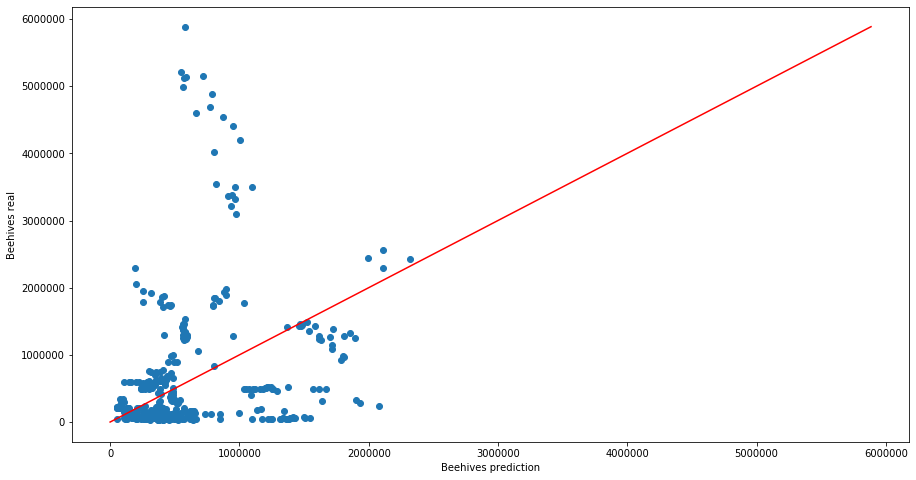

In [838]:
split_train_test(final_df)

In [832]:
final_df.Area.unique().size

87

We lost too many countries when merging with location dataframe so the prediction is very bad because we don't have enough data to train the model on.